In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer

In [17]:
titanic_df=pd.read_csv('D:\Data\\train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic_df.drop(columns=['Cabin','Name','Ticket'], inplace=True)

In [18]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# visulization

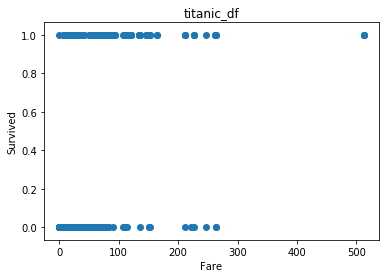

In [42]:
plt.scatter(titanic_df['Fare'], titanic_df['Survived'])

plt.title('titanic_df')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.show()

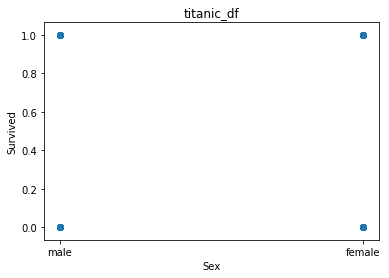

In [43]:
plt.scatter(titanic_df['Sex'], titanic_df['Survived'])

plt.title('titanic_df')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

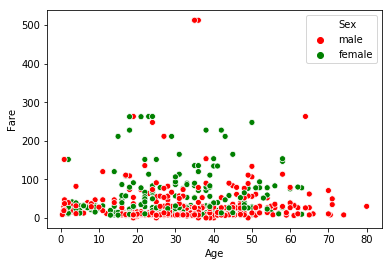

In [44]:
sns.scatterplot(x='Age',
                y='Fare',
                data=titanic_df, hue='Sex', palette=['r', 'g'])
plt.show()

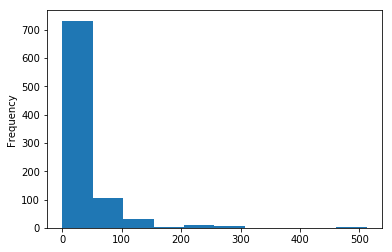

In [45]:
titanic_df['Fare'].plot.hist()
plt.show()

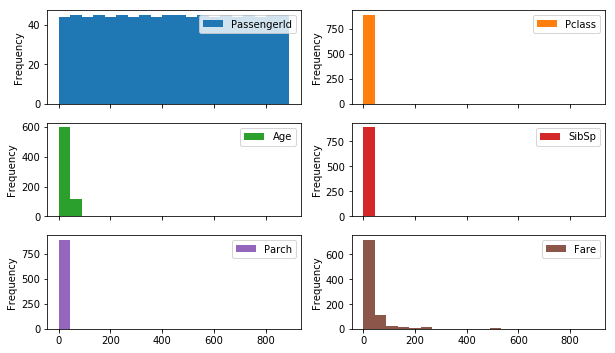

In [46]:
titanic_df.drop('Survived', axis=1).plot.hist(subplots=True, layout=(5,2), figsize=(10, 10), bins=20)
plt.show()

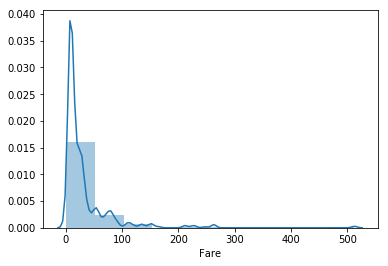

In [47]:
sns.distplot(titanic_df['Fare'], bins=10, kde=True)
plt.show()

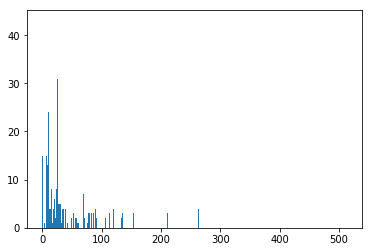

In [48]:
fig, ax = plt.subplots() 
data = titanic_df['Fare'].value_counts() 
Fare = data.index 
frequency = data.values 
ax.bar(Fare, frequency) 
plt.show()

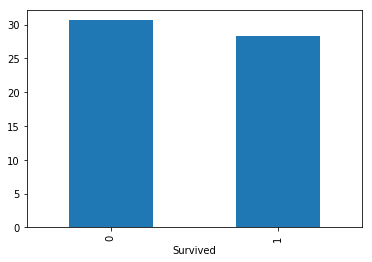

In [49]:
titanic_df.groupby("Survived").Age.mean().sort_values(ascending=False)[:5].plot.bar()
plt.show()

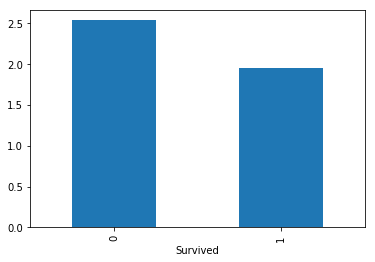

In [50]:
titanic_df.groupby("Survived").Pclass.mean().sort_values(ascending=False)[:5].plot.bar()
plt.show()

# DATA CLEANING

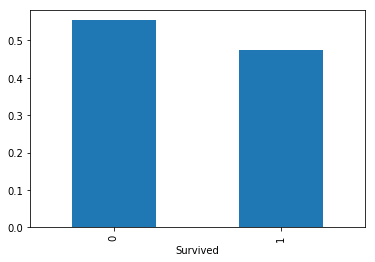

In [51]:
titanic_df.groupby("Survived").SibSp.mean().sort_values(ascending=False)[:5].plot.bar()
plt.show()

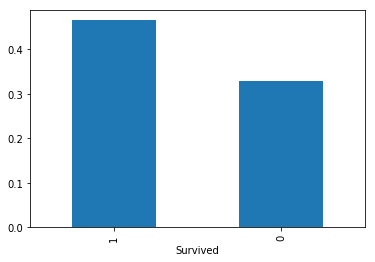

In [52]:
titanic_df.groupby("Survived").Parch.mean().sort_values(ascending=False)[:5].plot.bar()
plt.show()

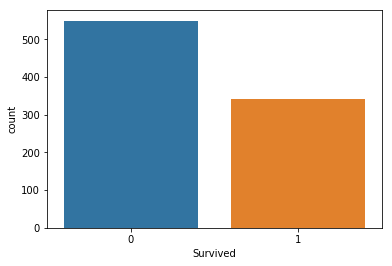

In [53]:
sns.countplot(x='Survived', data=titanic_df)
plt.show()

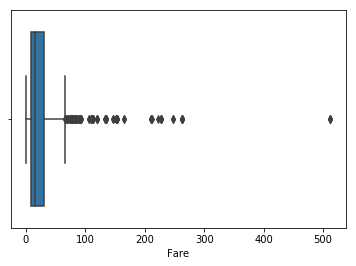

In [13]:
sns.boxplot(x='Fare', data=titanic_df)
plt.show()

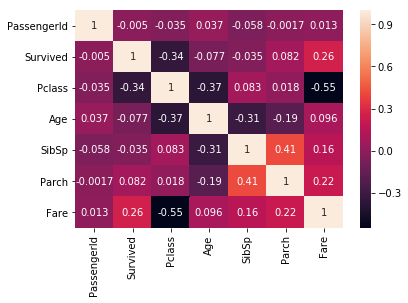

In [56]:
sns.heatmap(titanic_df.corr(),annot=True)
plt.show()

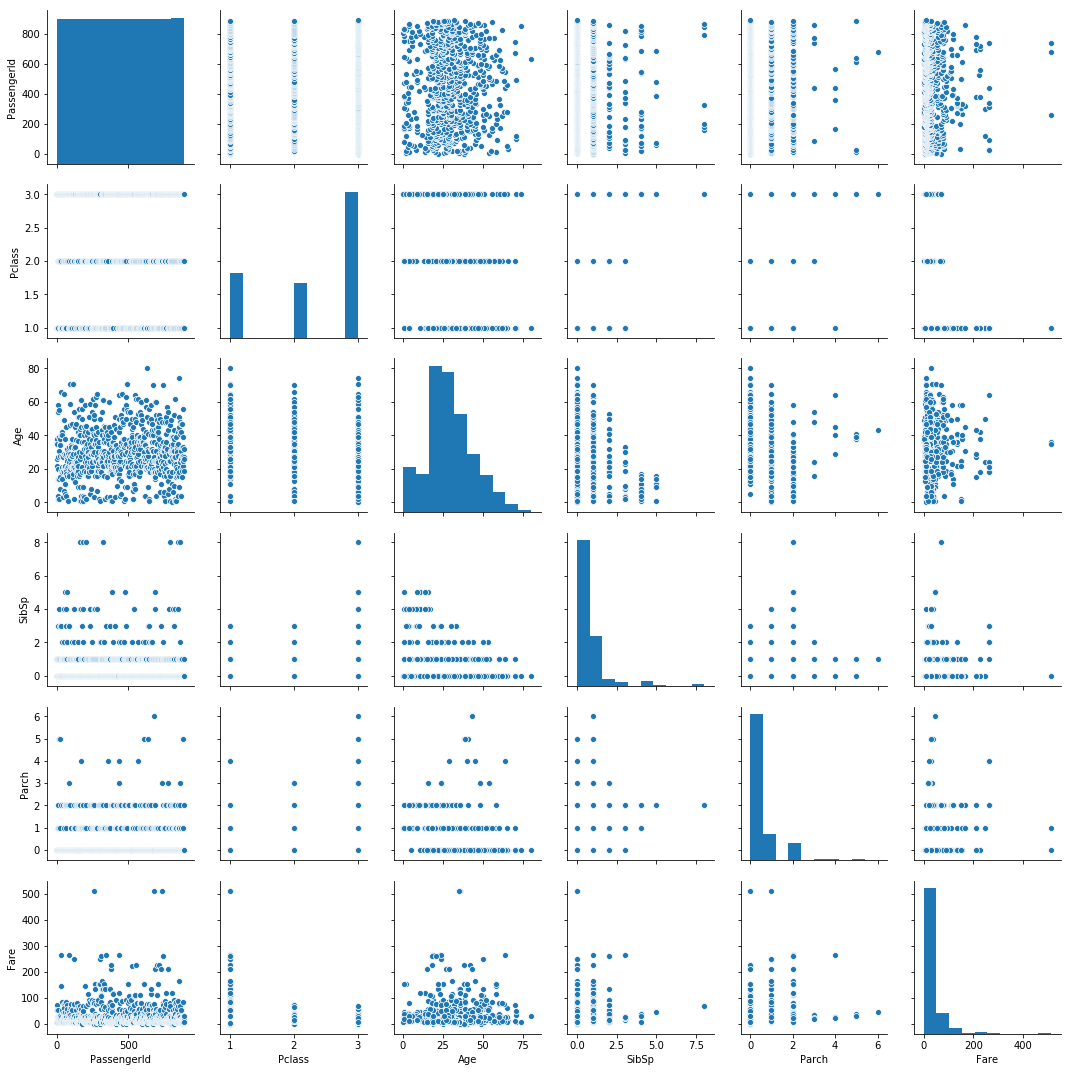

In [57]:
sns.pairplot(titanic_df.drop(['Survived'], axis=1))
plt.show()

In [3]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
titanic_df.Sex.unique()

array(['male', 'female'], dtype=object)

In [21]:
#LabelEncoder().fit_transform(titanic_df.Sex)

In [60]:
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
#LabelEncoder().fit_transform(titanic_df.Embarked)

In [72]:
titanic_df.loc[:, 'Sex'] = titanic_df.Sex.map({'female': 0, 'male': 1})

In [62]:
titanic_df.loc[:, 'Embarked'] = titanic_df.Embarked.map({'S': 0, 
                                                    'C': 1, 
                                                    'Q':2})

In [63]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0
5,6,0,3,1,NaN,0,0,8.4583,2.0
6,7,0,1,1,54.0,0,0,51.8625,0.0
7,8,0,3,1,2.0,3,1,21.0750,0.0
8,9,1,3,0,27.0,0,2,11.1333,0.0
9,10,1,2,0,14.0,1,0,30.0708,1.0


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [65]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [28]:
#titanic_df.drop(columns=['Cabin','Name','Ticket'], inplace=True)

In [29]:
#titanic_df.dropna(inplace=True)


In [66]:
titanic_df.fillna(data_df.Age.mean,inplace = True)

In [67]:
titanic_df.Embarked.value_counts()

0.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [33]:
#my_imputer = SimpleImputer()
#data_with_imputed_values = my_imputer.fit_transform(titanic_df)

In [68]:
titanic_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [69]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,0
1,2,1,1,0,38,1,0,71.2833,1
2,3,1,3,0,26,0,0,7.9250,0
3,4,1,1,0,35,1,0,53.1000,0
4,5,0,3,1,35,0,0,8.0500,0
5,6,0,3,1,<bound method Series.mean of 0 ...,0,0,8.4583,2
6,7,0,1,1,54,0,0,51.8625,0
7,8,0,3,1,2,3,1,21.0750,0
8,9,1,3,0,27,0,2,11.1333,0
9,10,1,2,0,14,1,0,30.0708,1


In [70]:
X=titanic_df.drop(['Survived'],axis=1).to_numpy()
y=titanic_df.Survived.to_numpy()

# TRAIN TEST SPLIT

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# PREPROCESSING

# NORMALIZATION

In [ ]:
nrm = MinMaxScaler()
X_train_nrm = nrm.fit_transform(X_train)
X_test_nrm = nrm.transform(X_test)

In [ ]:
clf=Logestic regression ()
clf.fit(X_train, y_train)

In [ ]:
y_pred_train = clf.predict(X_train)

print(classification_report(y_train, y_pred_train))

In [ ]:
y_pred_test = clf.predict(X_test)

print(classification_report(y_test, y_pred_test))